**Part-1**


---


**1: Brief description of algorithm, including references to sources used.**


---


**Logistic regression is a classification algorithm, used to predict the labels by training the classifier. To attempt classification, one method is to use linear regression and map all predictions greater than 0.5 as a 1 and all less than 0.5 as a 0. However, this method doesn't work well because classification is not actually a linear function and performs poorly. Hence, logistic regression uses an activation function(sigmoid) which fixes the issue and predicts the values between 0 and 1.**


---


**Sources - Coursera: Machine learning by Andrew Ng**
https://www.coursera.org/learn/machine-learning 

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random



---


**Implementation of Logistic regression**


---



In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [3]:
def model(X, y, learning_rate, iterations):
  m = X.shape[1] #training example
  n = X.shape[0] #number of features

  w = np.zeros((n,1))
  b = 0
  cost_list = []

  for i in range(iterations):
    z = np.dot(w.T, X) + b
    a = sigmoid(z)   #probabilistic predictions

    cost = -(1/m)*np.sum(y*np.log(a) + (1-y)*np.log(1-a))

    dw = (1/m)*np.dot(a - y, X.T)
    db = (1/m)*np.sum(a - y)

    w = w - learning_rate*dw.T
    b = b - learning_rate*db

    cost_list.append(cost)

    if(i%iterations/5 == 0):
      print("cost after ", i, "iteration is : ", cost)
  
  return w, b, cost_list


In [4]:
def accuracy(x, y, w, b):
  z = np.dot(w.T, x) + b
  a = sigmoid(z)

  a = a > 0.5

  a = np.array(a, dtype = 'int64')
  acc = (1 - np.sum(np.absolute( a - y))/y.shape[1])*100

  print("Accuracy of the model is : ", acc, "%")

**Part -2** 

---

**1.  Code to read in a dataset with variable number of training cases and attributes, and divide it into a training set, validation set and testing set.**


---



In [5]:
#importing blobs and moons dataset
!curl "https://raw.githubusercontent.com/mahima-sharma10/Deep-learning/main/blobs400.csv" > blobs400.csv
!curl "https://raw.githubusercontent.com/mahima-sharma10/Deep-learning/main/moons500.csv" > moons500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24044  100 24044    0     0   154k      0 --:--:-- --:--:-- --:--:--  155k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21028  100 21028    0     0   154k      0 --:--:-- --:--:-- --:--:--  153k


In [6]:
# Use pandas to read the CSV file as a dataframe
df_blobs = pd.read_csv("blobs400.csv")
df_moons = pd.read_csv("moons500.csv")
# The y values are those labelled 'Class': extract their values
y_blobs = df_blobs['Class'].values
y_moons = df_moons['Class'].values
# The x values are all other columns
del df_blobs['Class']   # drop the 'Class' column from the dataframe
X_blobs = df_blobs.values     # convert the remaining columns to a numpy array
# The x values are all other columns
del df_moons['Class']   # drop the 'Class' column from the dataframe
X_moons = df_moons.values     # convert the remaining columns to a numpy array

In [7]:
print(len(X_blobs))
print(len(y_blobs))
print(len(X_moons))
print(len(y_moons))
print(X_moons.shape),print(y_moons.shape),print(X_blobs.shape),print(y_blobs.shape)

400
400
500
500
(500, 2)
(500,)
(400, 3)
(400,)


(None, None, None, None)

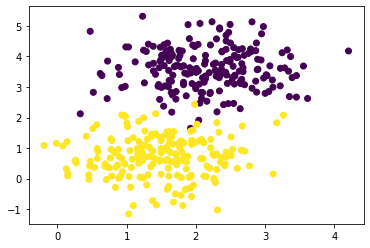

In [8]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X_blobs[:,0], X_blobs[:,1], c=y_blobs)  

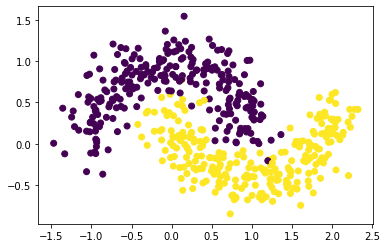

In [9]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons) 



---


**Blobs dataset: train the logistic regressor, use the validation set if needed, and test on the test set**

---



In [10]:
#splitting our data into training,validation and testing blobs dataset
from sklearn.model_selection import train_test_split

Xb, X_testblobs, yb, y_testblobs = train_test_split(X_blobs, y_blobs,train_size=0.8, test_size=0.2, random_state=1)
Xb, X_valblobs, yb, y_valblobs = train_test_split(Xb, yb,train_size=0.75, test_size=0.25, random_state=1)

Xb.shape,X_testblobs.shape,yb.shape,y_testblobs.shape,X_valblobs.shape,y_valblobs.shape

((240, 3), (80, 3), (240,), (80,), (80, 3), (80,))



---


**Moons dataset: train the logistic regressor, use the validation set if needed, and test on the test sett**

---



In [11]:
#splitting our data into training,validation and testing moons dataset
from sklearn.model_selection import train_test_split

Xm, X_testmoons, ym, y_testmoons = train_test_split(X_moons, y_moons,train_size=0.8, test_size=0.2, random_state=1)
Xm, X_valmoons, ym, y_valmoons = train_test_split(Xm, ym,train_size=0.75, test_size=0.25, random_state=1)

Xm.shape,X_testmoons.shape,ym.shape,y_testmoons.shape,X_valmoons.shape,y_valmoons.shape

((300, 2), (100, 2), (300,), (100,), (100, 2), (100,))

In [12]:
# blobs training dataset
xt_trainblobs =  Xb.T

# You can transpose the y data using 'reshape'
y1_trainblobs = np.reshape(yb, (len(yb),1))  
print ("np.shape(yt_blobs):", np.shape(y1_trainblobs))
(nsamples, nattribs) = np.shape(y1_trainblobs)
print ("y1_trainblobs transpose: nsamples =", nsamples, ", nattribs =", nattribs)
yt_trainblobs = y1_trainblobs.T

# moons training dataset
xt_trainmoons =  Xm.T

# You can transpose the y data using 'reshape'
y1_trainmoons = np.reshape(ym, (len(ym),1))  
print ("np.shape(yt_moons):", np.shape(y1_trainmoons))
(nsamples, nattribs) = np.shape(y1_trainmoons)
print ("y1_trainmoons transpose: nsamples =", nsamples, ", nattribs =", nattribs)
yt_trainmoons = y1_trainmoons.T

np.shape(yt_blobs): (240, 1)
y1_trainblobs transpose: nsamples = 240 , nattribs = 1
np.shape(yt_moons): (300, 1)
y1_trainmoons transpose: nsamples = 300 , nattribs = 1


In [13]:
print("Shape of xt_trainblobs : ", xt_trainblobs.shape)
print("Shape of yt_trainblobs : ", yt_trainblobs.shape)
print("Shape of xt_trainmoons : ", xt_trainmoons.shape)
print("Shape of yt_trainmoons : ", yt_trainmoons.shape)

Shape of xt_trainblobs :  (3, 240)
Shape of yt_trainblobs :  (1, 240)
Shape of xt_trainmoons :  (2, 300)
Shape of yt_trainmoons :  (1, 300)


In [14]:
#blobs dataset
xt_valblobs = X_valblobs.T

# You can transpose the y_valblobs data using 'reshape'
y1_valblobs = np.reshape(y_valblobs, (len(y_valblobs),1))  
print ("np.shape(yt_valblobs):", np.shape(y1_valblobs))
(nsamples, nattribs) = np.shape(y1_valblobs)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)
yt_valblobs = y1_valblobs.T

#moons dataset
xt_valmoons = X_valmoons.T

# You can transpose the y_valmoons data using 'reshape'
y1_valmoons = np.reshape(y_valmoons, (len(y_valmoons),1))  
print ("np.shape(yt_valmoons):", np.shape(y1_valmoons))
(nsamples, nattribs) = np.shape(y1_valmoons)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)
yt_valmoons = y1_valmoons.T

np.shape(yt_valblobs): (80, 1)
y transpose: nsamples = 80 , nattribs = 1
np.shape(yt_valmoons): (100, 1)
y transpose: nsamples = 100 , nattribs = 1


In [15]:
print("Shape of xt_valblobs : ", xt_valblobs.shape)
print("Shape of yt_valblobs : ", yt_valblobs.shape)
print("Shape of xt_valmoons : ", xt_valmoons.shape)
print("Shape of yt_valmoons : ", yt_valmoons.shape)

Shape of xt_valblobs :  (3, 80)
Shape of yt_valblobs :  (1, 80)
Shape of xt_valmoons :  (2, 100)
Shape of yt_valmoons :  (1, 100)


In [16]:
#blobs dataset
xt_testblobs = X_testblobs.T

# You can transpose the y_valblobs data using 'reshape'
y1_testblobs = np.reshape(y_testblobs, (len(y_testblobs),1))  
print ("np.shape(yt_valblobs):", np.shape(y1_testblobs))
(nsamples, nattribs) = np.shape(y1_testblobs)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)
yt_testblobs = y1_testblobs.T

#moons dataset
xt_testmoons = X_testmoons.T

# You can transpose the y_valmoons data using 'reshape'
y1_testmoons = np.reshape(y_testmoons, (len(y_testmoons),1))  
print ("np.shape(y1_testmoons):", np.shape(y1_testmoons))
(nsamples, nattribs) = np.shape(y1_testmoons)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)
yt_testmoons = y1_testmoons.T

np.shape(yt_valblobs): (80, 1)
y transpose: nsamples = 80 , nattribs = 1
np.shape(y1_testmoons): (100, 1)
y transpose: nsamples = 100 , nattribs = 1


In [17]:
print("Shape of xt_testblobs : ", xt_testblobs.shape)
print("Shape of yt_testblobs : ", yt_testblobs.shape)
print("Shape of xt_testmoons : ", xt_testmoons.shape)
print("Shape of yt_testmoons : ", yt_testmoons.shape)

Shape of xt_testblobs :  (3, 80)
Shape of yt_testblobs :  (1, 80)
Shape of xt_testmoons :  (2, 100)
Shape of yt_testmoons :  (1, 100)


In [18]:
iterations = 1000
learning_rate = 0.001
w1, b1, cost_list = model(xt_trainblobs, yt_trainblobs, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453


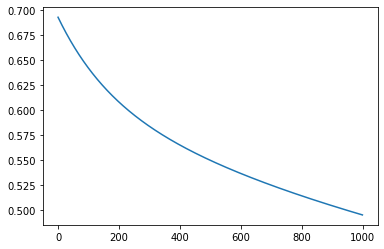

In [19]:
plt.plot(np.arange(iterations), cost_list)

In [20]:
#Accuracy on blobs validation set
accuracy(xt_valblobs, yt_valblobs, w1, b1)

Accuracy of the model is :  65.0 %




---


**Present results and observations on blobs test set**

---



In [21]:
#Accuracy on blobs test set
accuracy(xt_testblobs, yt_testblobs, w1, b1)

Accuracy of the model is :  70.0 %


In [22]:
iterations = 1000
learning_rate = 0.001
w2, b1, cost_list = model(xt_trainmoons, yt_trainmoons, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453


In [23]:
#Accuracy on moons validation set
accuracy(xt_valmoons, yt_valmoons, w2, b1)

Accuracy of the model is :  78.0 %




---


**Present results and observations on moons test set**



---





In [24]:
#Accuracy on moons test set
accuracy(xt_testmoons, yt_testmoons, w2, b1)

Accuracy of the model is :  81.0 %




---


**Part - 3**



---


**Brief description of algorithm, including references to sources used.** 

---


**Shallow neural networks are similar to deep learning networks. These networks are used to solve complex problems which algorithms without hidden layers cannot solve. Shallow neural networks contains 1 or 2 hidden layers not more than that.**

**References -** https://towardsdatascience.com/building-a-shallow-neural-network-a4e2728441e0
---



**Correct implementation of a feed-forward neural network with 1 hidden layer and a standard kernel such as sigmoid, including backprop, extending your previous implementation of logistic regression.**

---



In [25]:
def tanh(x):
  return np.tanh(x)

In [26]:
# Define the sigmoid derivative function
def derivative_tanh(x):
  return(1 - np.power(np.tanh(x),2))

# Define the sigmoid derivative function
def derivative_sigmoid(s):
    return sigmoid(s) * (1.0 - sigmoid(s))

In [27]:
#Initialising the model parameters
def parameters_initialization(input_unit, hidden_unit, output_unit):

    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [28]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return cache

In [29]:
#cost function
def cost_function(A2, Y):
    # number of training example
    m = Y.shape[1] 

    cost = -(1/m)*np.sum(Y*np.log(A2))

    #cost = -(1/m)*np.sum(Y*np.log(A2) + (1-Y)*(np.log(1-A2)))
    #cost = -(1/m)*np.sum(np.sum(Y*np.log(A2,0), 1))
    #s = Y * np.log(A2) + (1 - Y) * np.log(1 - A2)
    #cost = -np.sum(s) / m
    return cost

In [30]:
#Back propagation
def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # dZ1 = (1/m)*np.dot(W2.T, dZ2)*derivative_tanh(A1)
    dZ1 = np.dot(W2.T, dZ2)*derivative_tanh(A1)
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return gradients

In [31]:
#Gradient Descent (update parameters) / batch training
def update_parameters(parameters, gradients, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [32]:
# Neural Network Model
def neural_network_model(X, Y, hidden_unit, learning_rate, iterations):
    
    input_unit = X.shape[0]
    output_unit = Y.shape[0]

    cost_list = []
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, iterations):

        cache = forward_propagation(X, parameters)
        cost = cost_function(cache['A2'], Y)
        gradients = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)
        
        if (i%(iterations/10) == 0):
          print("Cost after", i, "iterations is :", cost)


    return parameters, cost_list

**Train on the Moons dataset**

In [33]:
iterations = 1000
hidden_unit = 4
learning_rate = 0.01
Parameters, cost_list = neural_network_model(xt_trainmoons, yt_trainmoons, hidden_unit=hidden_unit, learning_rate=learning_rate, iterations = iterations)

Cost after 0 iterations is : 0.34889476522016927
Cost after 100 iterations is : 0.34813740199080295
Cost after 200 iterations is : 0.34754663289458354
Cost after 300 iterations is : 0.34707562012227317
Cost after 400 iterations is : 0.34668365133178786
Cost after 500 iterations is : 0.34632869510602543
Cost after 600 iterations is : 0.3459575164360731
Cost after 700 iterations is : 0.3454900183022901
Cost after 800 iterations is : 0.34479277118995966
Cost after 900 iterations is : 0.3436346989975015


<function matplotlib.pyplot.show(close=None, block=None)>

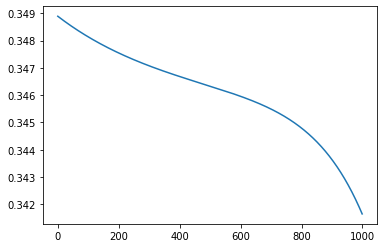

In [34]:
t = np.arange(0, iterations)
plt.plot(t, cost_list)
plt.show

In [35]:
def accuracy(inp, labels, paramters):
  cache = forward_propagation(inp, Parameters)
  a_out = cache['A2']
  
  a_out = np.argmax(a_out, 0)
  y_out = np.argmax(labels,0)
  a_out == y_out
  
  acc = np.mean(a_out == y_out)*100
  
  return acc

**Test on the Moons dataset**

In [36]:
print("Accuracy of train dataset is :", accuracy(xt_trainmoons, yt_trainmoons, Parameters))
print("Accuracy of test dataset is :", accuracy(xt_testmoons, yt_testmoons, Parameters))

Accuracy of train dataset is : 100.0
Accuracy of test dataset is : 100.0


**Train on the blobs dataset**

In [37]:
iterations = 1000
hidden_unit = 4
learning_rate = 0.01
Parameters, cost_list = neural_network_model(xt_trainblobs, yt_trainblobs, hidden_unit=hidden_unit, learning_rate=learning_rate, iterations = iterations)

Cost after 0 iterations is : 0.33514439835481724
Cost after 100 iterations is : 0.339072587607235
Cost after 200 iterations is : 0.34283360738751884
Cost after 300 iterations is : 0.34778050744021594
Cost after 400 iterations is : 0.3540344726858315
Cost after 500 iterations is : 0.3547617693497867
Cost after 600 iterations is : 0.3387698126051023
Cost after 700 iterations is : 0.30362117723980914
Cost after 800 iterations is : 0.25975034590067564
Cost after 900 iterations is : 0.21956686155029617


<function matplotlib.pyplot.show(close=None, block=None)>

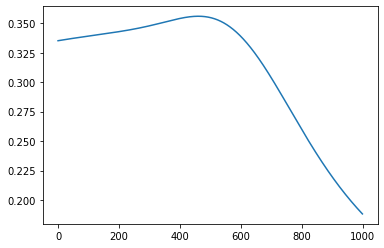

In [38]:
t = np.arange(0, iterations)
plt.plot(t, cost_list)
plt.show

**Test on the Moons dataset**

In [39]:
print("Accuracy of train dataset is :", accuracy(xt_trainblobs, yt_trainblobs, Parameters))
print("Accuracy of test dataset is :", accuracy(xt_testblobs, yt_testblobs, Parameters))

Accuracy of train dataset is : 100.0
Accuracy of test dataset is : 100.0




---


**Observations : The model is correctly implemented and it can be seen that the accuracy of implemented model is 100% which upto some extent delivers the message that it is either over learning or the model is overfitting. Although, when the trend is seen after iteration, cost error seems to be decreasing.**




---


**Part - 4**

---
**Code to read in the big dataset, and sample subsets for training, validation and testing**


---



In [40]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='test'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.


In [41]:
(train_imgs, train_labels) = load_mnist('/content/drive/MyDrive/Colab Notebooks/', 'train')
(test_imgs, test_labels) = load_mnist('/content/drive/MyDrive/Colab Notebooks/', 't10k')
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 784)
(10000, 784)


In [42]:
label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [43]:
import numpy as np

train_filter = np.where((train_labels == 3 ) | (train_labels == 7))
test_filter = np.where((test_labels == 3) | (test_labels == 7))

In [44]:
train_images, train_labels = train_imgs[train_filter], train_labels[train_filter]
test_images, test_labels = test_imgs[test_filter], test_labels[test_filter]

In [45]:
test_labels

array([7, 7, 3, ..., 7, 3, 7], dtype=uint8)

In [46]:
#fashion dataset
train_images_t = train_images.T

# You can transpose the y_valblobs data using 'reshape'
y1_train_labels = np.reshape(train_labels, (len(train_labels),1))  
print ("np.shape(y1_train_labels):", np.shape(y1_train_labels))
(nsamples, nattribs) = np.shape(y1_train_labels)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)
train_labels_t = y1_train_labels.T

#moons dataset
test_images_t = test_images.T

# You can transpose the y_valmoons data using 'reshape'
y1_test_labels = np.reshape(test_labels, (len(test_labels),1))  
print ("np.shape(y1_test_labels):", np.shape(y1_test_labels))
(nsamples, nattribs) = np.shape(y1_test_labels)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)
test_labels_t = y1_test_labels.T

np.shape(y1_train_labels): (12000, 1)
y transpose: nsamples = 12000 , nattribs = 1
np.shape(y1_test_labels): (2000, 1)
y transpose: nsamples = 2000 , nattribs = 1


In [47]:
print(train_images_t.shape)
print(train_labels_t.shape)
print(test_images_t.shape)
print(test_labels_t.shape)

(784, 12000)
(1, 12000)
(784, 2000)
(1, 2000)


**Train the NN**

In [48]:
iterations = 1000
hidden_unit = 4
learning_rate = 0.001
Parameters, cost_list = neural_network_model(train_images_t, train_labels_t, hidden_unit=hidden_unit, learning_rate=learning_rate, iterations = iterations)

Cost after 0 iterations is : 3.444065522026529
Cost after 100 iterations is : 0.5521516658540302
Cost after 200 iterations is : 0.07657212473179303
Cost after 300 iterations is : 0.010397087798575122
Cost after 400 iterations is : 0.0014077195045331394
Cost after 500 iterations is : 0.00019052559761157
Cost after 600 iterations is : 2.5785045979427647e-05
Cost after 700 iterations is : 3.489630351742029e-06
Cost after 800 iterations is : 4.722701830601504e-07
Cost after 900 iterations is : 6.39148199565492e-08


<function matplotlib.pyplot.show(close=None, block=None)>

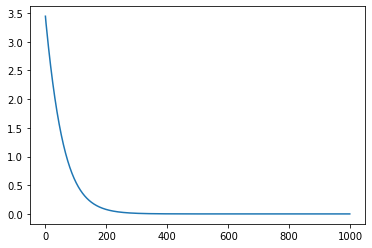

In [49]:
t = np.arange(0, iterations)
plt.plot(t, cost_list)
plt.show

In [50]:
print("Accuracy of train dataset is :", accuracy(train_images_t , train_labels_t, Parameters))
print("Accuracy of test dataset is :", accuracy(test_images_t, test_labels_t, Parameters))

Accuracy of train dataset is : 100.0
Accuracy of test dataset is : 100.0


Part -5 

---


**L2 regularisation**

---

**I have implemented the neural network again with an additional term of L2 regularisation in the cost function. L2 regularisation helps in the over-learning of the model and reduces or removes some terms from equation to give a balanced weight and accuracy score as L2 regularisation tends to shrink ters evenly.**

**References** - **https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c**

In [51]:
#cost function
def cost_fnctn_reg(A2, Y, parameters, lambd):
    # number of training example
    m = Y.shape[1] 

    W1 = parameters['W1']
    W2 = parameters['W2']

    cost = -(1/m)*np.sum(Y*np.log(A2))
    L2_regularisation_cost = (lambd/2*m)*(np.sum(np.square(W1) + np.sum(np.square(W2))))

    cost = cost + L2_regularisation_cost
    
    return cost

In [52]:
#Back propagation
def backward_propagation_reg(parameters, cache, X, Y, lambd):
    #number of training example
    m = X.shape[1]
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    A1 = cache['A1']
    A2 = cache['A2']
   
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T) + (lambd*W2)/m
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = (1/m)*np.dot(W2.T, dZ2)*derivative_tanh(A1)
    dW1 = (1/m) * np.dot(dZ1, X.T) + (lambd*W1)/m
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return gradients

In [53]:
# Neural Network Model
def neural_network_model_reg(X, Y, hidden_unit, learning_rate, iterations, lambd):
    
    input_unit = X.shape[0]
    output_unit = Y.shape[0]

    cost_list = []
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    for i in range(0, iterations):

        cache = forward_propagation(X, parameters)
        cost = cost_fnctn_reg(cache['A2'], Y, parameters, lambd)
        gradients = backward_propagation_reg(parameters, cache, X, Y, lambd)
        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)
        
        if (i%(iterations/10) == 0):
          print("Cost after", i, "iterations is :", cost)


    return parameters, cost_list

In [54]:
iterations = 1000
hidden_unit = 4
learning_rate = 0.001
lambd = 0.7
Parameters, cost_list = neural_network_model_reg(train_images_t, train_labels_t, hidden_unit=hidden_unit, learning_rate=learning_rate, iterations = iterations, lambd=lambd)

Cost after 0 iterations is : 7011.280023545364
Cost after 100 iterations is : 5775819.234847634
Cost after 200 iterations is : 24210086.279032957
Cost after 300 iterations is : 55561595.22017332
Cost after 400 iterations is : 101025186.8052632
Cost after 500 iterations is : 163260245.73550183
Cost after 600 iterations is : 242468994.49506637
Cost after 700 iterations is : 338542922.77440727
Cost after 800 iterations is : 451474282.45759827
Cost after 900 iterations is : 581262966.1692557


In [55]:
print("Accuracy of train dataset is :", accuracy(train_images_t , train_labels_t, Parameters))
print("Accuracy of test dataset is :", accuracy(test_images_t, test_labels_t, Parameters))

Accuracy of train dataset is : 100.0
Accuracy of test dataset is : 100.0
